### Introduction

Dataset: https://www.kaggle.com/datasets/juledz/heart-attack-prediction/data 
This data set contains details of various health measurements that research has shown to be indicative of heart attacks in patients. 

### Imports

In [1]:
pip install library

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from datetime import datetime
from library1.sb_utils import save_file

df = pd.read_csv('/Users/sharanaravindh/Desktop/springboard/Github repository/Untitled Folder/Data/heart.csv')

## Data Definition<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [3]:
#the dataset has 1025 entries 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

-Age (Numeric): Represents the age of the individual.

-Sex (Categorical): Indicates the gender of the individual (0: Female, 1: Male).

-Chest Pain Type (Categorical): Describes the type of chest pain experienced by the -individual, categorized into four types.

-Resting Blood Pressure (Numeric): Represents the blood pressure of the individual at rest.
-Serum Cholesterol (Numeric): Indicates the cholesterol levels in milligrams per deciliter (mg/dL).

-Fasting Blood Sugar (Categorical): Indicates whether the fasting blood sugar is above 120 mg/dL (1: Yes, 0: No).

-Resting Electrocardiographic Results (Categorical): Describes the resting electrocardiographic results as normal, abnormal, or hypertrophy.

-Maximum Heart Rate Achieved (Numeric): Represents the highest heart rate achieved during testing.

-Exercise-Induced Angina (Categorical): Indicates whether angina was induced by exercise (1: Yes, 0: No).

-Oldpeak (ST Depression) (Numeric): Represents the ST depression induced by exercise relative to rest.

-Slope of Peak Exercise ST Segment (Categorical): Describes the slope of the peak exercise ST segment as upsloping, flat, or downsloping.

-Number of Major Vessels Colored by Fluoroscopy (Numeric): Represents the count of major vessels colored by fluoroscopy (angiography).

-Thalassemia (Categorical): Describes thalassemia as normal, fixed defect, or reversible defect.

In [5]:
#Number of unique values in each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target       52
dtype: int64

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target      float64
dtype: object

## Data Cleaning<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [9]:
# Renaming columns for easier understanding 
df = df.rename(columns={'cp':'chest_pain', 'trestbps':'rest_bp', 'chol':'cholesterol', 'fbs':'blood_sugar', 'restecg':'rest_ecg', 'thalach':'max_heart_rate', 'exang':'exercise_induced_angina', 'oldpeak':'st_depression', 'slope':'st_slope', 'ca':'vessels_fluroscopy', 'thal':'thalassemia',})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain               1025 non-null   int64  
 3   rest_bp                  1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   blood_sugar              1025 non-null   int64  
 6   rest_ecg                 1025 non-null   int64  
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  st_slope                 1025 non-null   int64  
 11  vessels_fluroscopy       1025 non-null   int64  
 12  thalassemia              1025 non-null   int64  
 13  target                   1025 non-null   float64
dtypes: float64(2), int64(12)

In [10]:
df.isnull().any()
#the dataset has no null values

age                        False
sex                        False
chest_pain                 False
rest_bp                    False
cholesterol                False
blood_sugar                False
rest_ecg                   False
max_heart_rate             False
exercise_induced_angina    False
st_depression              False
st_slope                   False
vessels_fluroscopy         False
thalassemia                False
target                     False
dtype: bool

Age: Numeric (e.g., 52) 

Sex: Categorical (0: Female, 1: Male) 

Chest Pain Type: Categorical (0: Typical Angina, 1: Atypical Angina, 2: Non-anginal Pain, 3: Asymptomatic) 

Resting Blood Pressure: Numeric (e.g., 125) 

Serum Cholesterol: Numeric in mg/dL (e.g., 212) 

Fasting Blood Sugar: Categorical (0: <= 120 mg/dL, 1: > 120 mg/dL) 

Resting Electrocardiographic Results: Categorical (0: Normal, 1: Abnormality, 2: Hypertrophy) 

Maximum Heart Rate Achieved: Numeric (e.g., 168) 

Exercise-Induced Angina: Categorical (0: No, 1: Yes) 

Oldpeak (ST Depression): Numeric (e.g., 1.0) 

Slope of Peak Exercise ST Segment: Categorical (0: Upsloping, 1: Flat, 2: Downsloping) 

Number of Major Vessels Colored by Fluoroscopy: Numeric (0 to 3) 

Thalassemia: Categorical (0: Normal, 1: Fixed Defect, 2: Reversible Defect)

In [22]:
#Converting some of the int columns which are supposed to be cateogorical 
columns_to_convert = ['sex','chest_pain','rest_ecg','st_slope','thalassemia','target','exercise_induced_angina','blood_sugar']
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [23]:
df.describe()

,age,rest_bp,cholesterol,max_heart_rate,st_depression,vessels_fluroscopy
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


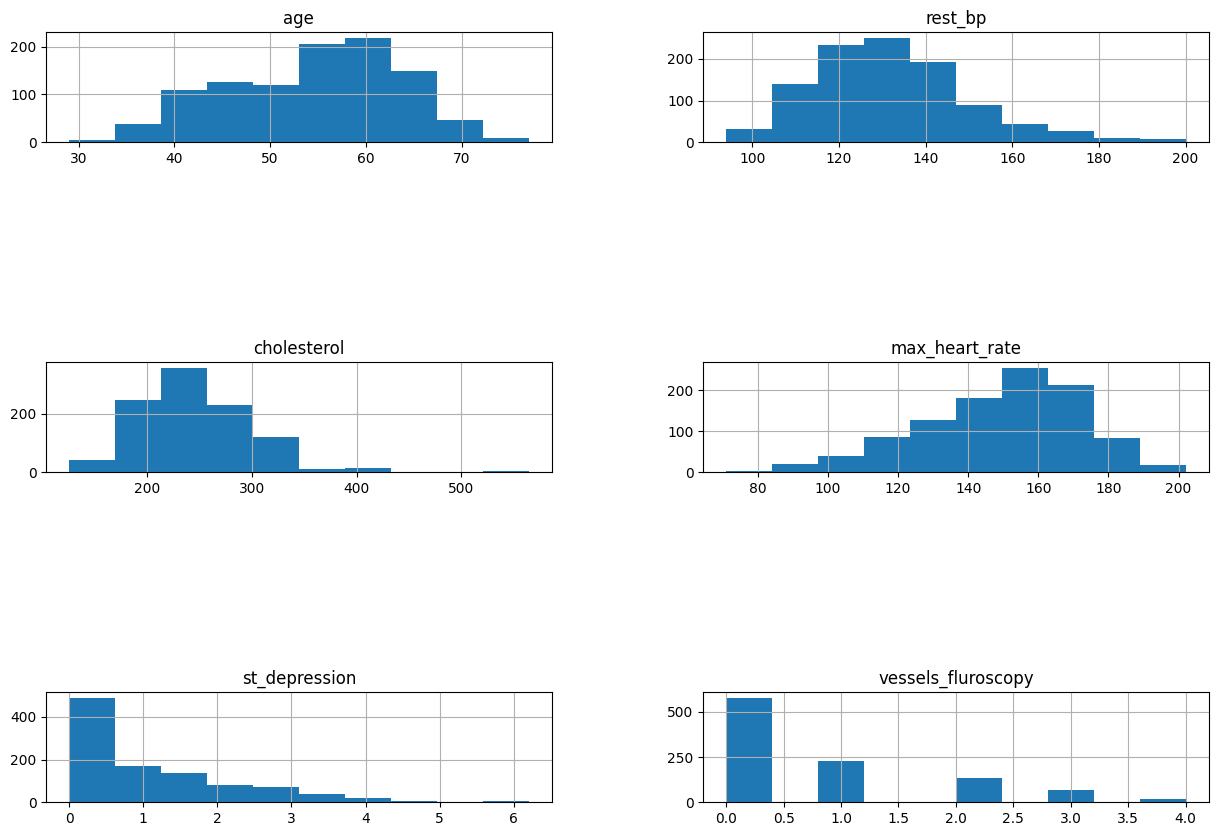

In [24]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=2.0);

All the numerical columns seem not to have any outliers except for vessel_fluroscopy, which the max value is supposed to be 3 for. I will rectify this issue by dropping the rows above 3.0

In [26]:
df = df[df['vessels_fluroscopy'] <= 3]

In [28]:
df.info()
#The drop removed around 18 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1007 non-null   int64   
 1   sex                      1007 non-null   category
 2   chest_pain               1007 non-null   category
 3   rest_bp                  1007 non-null   int64   
 4   cholesterol              1007 non-null   int64   
 5   blood_sugar              1007 non-null   category
 6   rest_ecg                 1007 non-null   category
 7   max_heart_rate           1007 non-null   int64   
 8   exercise_induced_angina  1007 non-null   category
 9   st_depression            1007 non-null   float64 
 10  st_slope                 1007 non-null   category
 11  vessels_fluroscopy       1007 non-null   int64   
 12  thalassemia              1007 non-null   category
 13  target                   1007 non-null   category
dtypes: categ

In [29]:
#saving file
datapath = '/Users/sharanaravindh/Desktop/springboard/Github repository/Untitled Folder/Data'
save_file(df,'hearattack_cleaned.csv',datapath)

Writing file.  "/Users/sharanaravindh/Desktop/springboard/Github repository/Untitled Folder/Data/hearattack_cleaned.csv"
